In [4]:
import numpy as np

In [9]:
def make_deck(y):
    #y is the number of decks in the shoe. 
    #I assume that we have no info on the deck other than our 7s and the dealer's 10
    deck = np.array([y for y in range(2,15)*4*y])
    deck = np.delete(deck,[8])
    deck = np.delete(deck,[5])
    deck = np.delete(deck,[16])
    for i in range(len(deck)):
        #if i is a facecard, replace these values with 10. Aces are only 11, but I deal with that later.
        if deck[i] in [12,13,14]:
            deck[i] = 10
        if deck[i]==11:
            deck[i]=1
    np.random.shuffle(deck)
    return deck

In [97]:
def simulation(x,y):
    #this simulations a hand. x is the "decision point". This is the minimum number that we stay on. 
    #so the basic example y=14, means that we stay intially and do nothing. y is the number of decks
    deck = make_deck(y)
    #initialize my total at 7,7 =14
    my_score = 14
    while (my_score<x):
        my_score+=deck[0]
        deck = np.delete(deck,[0])
        
    #if we bust, we lose 1 unit. No reason to consider the dealer's action
    if my_score>21:
        return -1
    else:
        dealer_score=10
        
        ##while the card that is at the top is an ace, shuffle the deck so it is not 11. This is because
        ##we know that the dealer is not dealt a blackjack
        while deck[0]==1:
            np.random.shuffle(deck)
        while (dealer_score<17):
            dealer_score+=deck[0]
            deck = np.delete(deck,[0])
        if dealer_score>21:
            return 1
        elif dealer_score>my_score:
            return -1
        elif my_score>dealer_score:
            return 1
        else:
            return 0
    

In [98]:
def monte(n,x,y):
    #n is the number of simulations. x is the decision point. y is the number of decks
    result = 0
    for i in range(n):
        result+=simulation(x,y)
    
    return float(result)/n

In [126]:
monte(1000000,14,6)

-0.52623

In [127]:
monte(1000000,15,6)

-0.492727

In [128]:
monte(1000000,16,6)

-0.490473

In [129]:
monte(1000000,17,6)

KeyboardInterrupt: 

In [ ]:
monte(1000000,18,6)

In [ ]:
monte(1000000,19,6)

In [ ]:
monte(1000000,20,6)

In [ ]:
monte(1000000,21,6)

In [12]:
##for the second blog post

In [15]:
def simulation2(x,y):
    #this simulations a hand. x is whether to stand or to hit. 1 represents hit, 0 represents stand
    #y is the number of decks
    deck = make_deck(y)
    #initialize my total at 7,7 =14
    my_score = 14
    ##if the decision is to hit, add the value of that card to my_score and remove the card
    if x:
        my_score+=deck[0]
        deck = np.delete(deck,[0])
    #if we bust, we lose. No reason to consider the dealer's action
        if my_score>21:
            return -1
    else:
        dealer_score=10
        
        ##while the card that is at the top is an ace, shuffle the deck so it is not ace. This is because
        ##we know that the dealer is not dealt a blackjack
        while deck[0]==1:
            np.random.shuffle(deck)
        while (dealer_score<17):
            dealer_score+=deck[0]
            deck = np.delete(deck,[0])
        if dealer_score>21:
            return 1
        elif dealer_score>my_score:
            return -1
        elif my_score>dealer_score:
            return 1
        else:
            return 0

In [16]:
def monte2(n,x,y):
    #n is the number of simulations. x is whether we hit or stand. y is the number of decks
    result = 0
    for i in range(n):
        result+=simulation2(x,y)
    
    return float(result)/n

In [17]:
monte2(1000000,1,6)

-0.477122

In [18]:
monte2(1000000,0,6)

-0.535446

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
def make_distribution(n,x,y):
    arr = []
    for i in range(n):
        arr.append(simulation2(x,y))
    print float(sum(arr))/len(arr)
    return arr

In [35]:
x = make_distribution(100000,0,6)

-0.53756


(array([ 76878.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23122.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

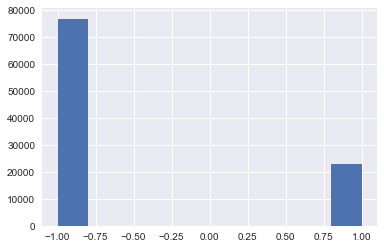

In [36]:
plt.hist(x)

In [37]:
x = make_distribution(100000,1,6)

-0.47281


(array([ 70670.,      0.,      0.,      0.,      0.,   5941.,      0.,
             0.,      0.,  23389.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

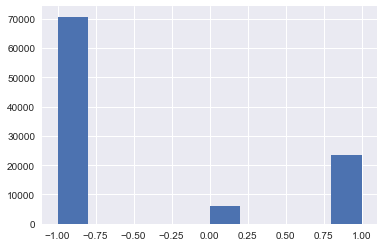

In [38]:
plt.hist(x)

In [80]:
sample_means = []
for i in range(10000):
    sample_means.append(monte2(100,0,6))

(array([   1.,    8.,    0.,   11.,   20.,    0.,   38.,    0.,   74.,
         142.,    0.,  222.,  329.,    0.,  458.,    0.,  603.,  752.,
           0.,  863.,  885.,    0.,  958.,    0.,  909.,  834.,    0.,
         728.,    0.,  562.,  493.,    0.,  358.,  276.,    0.,  197.,
           0.,  110.,   67.,    0.,   53.,   29.,    0.,    6.,    0.,
           6.,    3.,    0.,    4.,    1.]),
 array([-0.82  , -0.8076, -0.7952, -0.7828, -0.7704, -0.758 , -0.7456,
        -0.7332, -0.7208, -0.7084, -0.696 , -0.6836, -0.6712, -0.6588,
        -0.6464, -0.634 , -0.6216, -0.6092, -0.5968, -0.5844, -0.572 ,
        -0.5596, -0.5472, -0.5348, -0.5224, -0.51  , -0.4976, -0.4852,
        -0.4728, -0.4604, -0.448 , -0.4356, -0.4232, -0.4108, -0.3984,
        -0.386 , -0.3736, -0.3612, -0.3488, -0.3364, -0.324 , -0.3116,
        -0.2992, -0.2868, -0.2744, -0.262 , -0.2496, -0.2372, -0.2248,
        -0.2124, -0.2   ]),
 <a list of 50 Patch objects>)

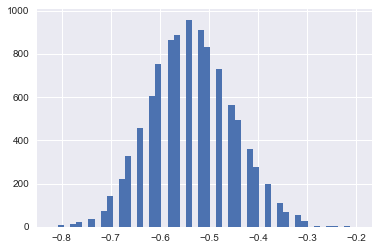

In [82]:
plt.hist(sample_means,bins =50)

In [50]:
sum(sample_means)/len(sample_means)

-0.5363819999999975

In [54]:
sample_means = []
for i in range(2000):
    sample_means.append(monte2(400,0,6))

sns.distplot(sample_means,bins =11)

print sum(sample_means)/len(sample_means)

-0.536466


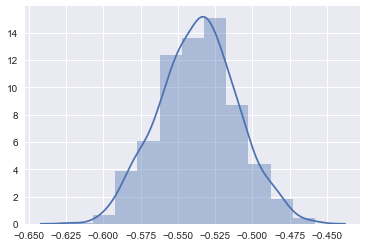

In [62]:
sample_means = []
for i in range(1000):
    sample_means.append(monte2(1000,0,6))

print sum(sample_means)/len(sample_means)
sns.distplot(sample_means,bins =11)

In [64]:
sample_means = []
for i in range(500):
    sample_means.append(monte2(5000,0,6))

print sum(sample_means)/len(sample_means)

-0.5351288


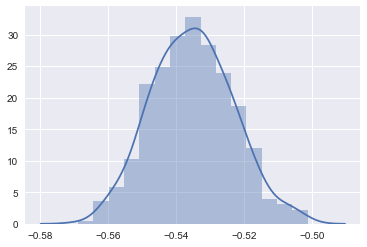

In [66]:

sns.distplot(sample_means,bins =15)

In [67]:
sample_means = []
for i in range(20000):
    sample_means.append(monte2(3,0,6))

print sum(sample_means)/len(sample_means)

-0.5426


(array([ 9195.,     0.,     0.,     0.,     0.,  8151.,     0.,     0.,
            0.,     0.,  2391.,     0.,     0.,     0.,   263.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,  1.        ]),
 <a list of 15 Patch objects>)

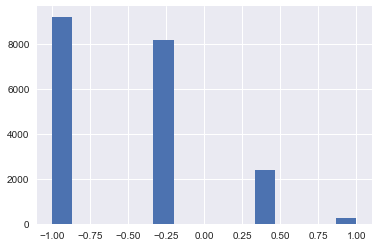

In [69]:
plt.hist(sample_means,bins =15)

In [70]:
sample_means = []
for i in range(10000):
    sample_means.append(monte2(10,0,6))

print sum(sample_means)/len(sample_means)

-0.54104


(array([  7.67000000e+02,   2.12600000e+03,   0.00000000e+00,
          2.96600000e+03,   0.00000000e+00,   2.37400000e+03,
          0.00000000e+00,   1.21700000e+03,   0.00000000e+00,
          4.22000000e+02,   0.00000000e+00,   1.08000000e+02,
          0.00000000e+00,   1.80000000e+01,   2.00000000e+00]),
 array([-1.        , -0.89333333, -0.78666667, -0.68      , -0.57333333,
        -0.46666667, -0.36      , -0.25333333, -0.14666667, -0.04      ,
         0.06666667,  0.17333333,  0.28      ,  0.38666667,  0.49333333,
         0.6       ]),
 <a list of 15 Patch objects>)

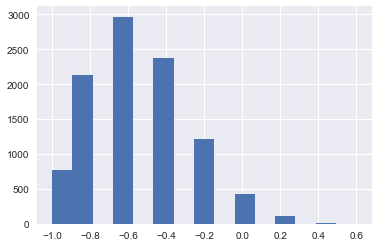

In [72]:
plt.hist(sample_means, bins=15)

In [94]:
monte2(100000,0,6)

-0.53488

In [100]:
((-1--.5352)**2*76760 +(1--.5352)**2*23240)/99999/100000

7.1356809568095705e-06

In [95]:
1.4271361913619141e-05+-.5352

-0.5351857286380864

In [96]:
import numpy as np
def calc_var(n,x,y):
    result = []
    for i in range(n):
        result.append(simulation2(x,y))
    result = np.array(result)
    return np.var(result) 

In [97]:
calc_var(100000,0,6)

0.71642244960000001

In [99]:

(0.71642244960000001/100000)**.5

0.0026766068997893583

In [106]:
-.5352+1*Out[99]

-0.5325233931002107

In [107]:
-.5352-1*Out[99]

-0.5378766068997893